# <ins>Sentiment Analysis: "Covid Vaccine" on Twitter</ins>
## Classification Modeling
## Overview
In this notebook I begin classifying my preprocessed tweets about the COVID-19 vaccine that I saved and pickled in the previous [EDA](https://github.com/davidlebruce/covid_vaccine_tweets/blob/main/03_EDA.ipynb) notebook. In order to use text data in my models I first needed to vectorize the text and create a sparse matrix (mostly filled with zeros) of Term Frequency - Inter-Document Frequency (Tfidf) values. The Tfidf value is simply the amount of times a term appears in a tweet, divided by the number of times it shows up in the corpus I used Scikit_Learn's TfidfVectorizer to accomplish this. As you move throughout the notebook you'll see how I navigate from my first simple model, a multinomial naive bayes, to my final model, a more complex ..., and the thought process behind each step.

#### Model Evaluation Metrics
I chose to evaluate my models on their F1 scores as this strikes a good balance between precision and recall, and a model cannot produce a strong F1 score without being strong in both. From my perspective there are no significant risks in overcompensating for misclassifying tweets as either positive, negative, or neutral, so evaluating on the F1  accounts for all angles.

## MORE TEXT PLZ (and review)

In [1]:
# standard python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# sklearn modeling packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# optimize viewing
pd.set_option('max_colwidth', 150)
pd.set_option('display.max_columns', 200)

# NLP Feature Engineering 
or importing preprocessed data EDA ntbk

In [2]:
# unpickle cleaned tweets dataframe
df = pd.read_pickle('./data/modeling_df.pkl')

In [3]:
# confirm data is as it should be
df.head()

,date,tweet,username,link,nlikes,nreplies,nretweets,vader_score,vader_sentiment,clean_tweets
0,2020-02-28,"For everyone comparing COVID-19 to the flu, just a reminder that even with vaccines the flu kills tens of thousands a year. Now imagine a more dea...",MonaIbrahim,https://twitter.com/MonaIbrahim/status/1233542386669641728,3,0,0,-0.8598,negative,everyone compare flu reminder even flu kill ten thousand year imagine much deadly assurance develope affordable hello pandemic
1,2020-02-28,"“Perhaps more than any other type of medicine, the success of a #vaccine depends on the cooperation of everyone. To protect those who can’t have a...",Moratel_Entles,https://twitter.com/Moratel_Entles/status/1233542196193824769,1,0,0,0.7430,positive,perhaps much type medicine success depend cooperation everyone protect young promise need massive buy population large
2,2020-02-28,Provide pharmaceutical companies with the opportunity to develop this vaccine and drug as soon as possible and to reach mass production. As you kn...,help_4_Iranian,https://twitter.com/help_4_Iranian/status/1233542052161507328,0,0,0,0.4404,positive,provide pharmaceutical company opportunity develop drug soon possible reach mass production know drug produce
3,2020-02-28,From John's Hopkins: 1) Immediate risk of COVID-19 remains low in the U.S. The best way to protect yourself is by practicing the same precaution...,TruthFreedom17,https://twitter.com/TruthFreedom17/status/1233541922108694528,1,1,0,0.3818,positive,john hopkins immediate risk remain low us well way protect practice precaution would use prevent spread respiratory disease currently prevent
4,2020-02-28,If the #stockmarkets keep falling - how confident will you be about a #vaccine for #COVID-19 and funds being available for their development?,notarywise,https://twitter.com/notarywise/status/1233541049903177728,0,0,0,0.3818,positive,stockmarkets keep fall confident fund available development


## Feature Engineering with Tfidf
perhaps this belongs in the above section?

In [4]:
# set up the features and the target
data = df['clean_tweets']
target = df['vader_sentiment']

# instantiate Tfidf vectorizer where token must appear in at least 30 documents
tfidf = TfidfVectorizer(min_df=30)

# .fit_transform 
data_tfidf = tfidf.fit_transform(data)

In [5]:
# convert sparse matrix to pandas dataframe
modeling_df = pd.DataFrame(data_tfidf.todense(), columns = tfidf.get_feature_names())
modeling_df.shape

(77259, 3536)

In [6]:
# take a look at the modeling dataframe
modeling_df.head()

,abandon,abbott,abc,abcnews,ability,able,abort,aborted,abortion,absence,absolute,absolutely,abt,abuse,academic,accelerate,accelerating,accept,acceptable,acceptance,access,accessible,accident,accord,according,account,accurate,accuse,achieve,achievement,acip,acknowledge,acquire,across,act,action,active,actively,activity,actual,actually,ad,adapt,adarpoonawalla,add,addition,additional,address,ade,adenovirus,adequate,adjust,adjuvant,admin,administer,administering,administration,admit,adopt,adult,adults,advance,advantage,adverse,advice,advise,adviser,advisor,advisory,advocate,affect,afford,affordable,afneil,afraid,africa,african,afternoon,age,agency,agenda,agendum,agent,aggressive,ago,agree,agreement,ah,ahead,ai,aid,aids,aim,air,airborne,airline,airlines,airport,aka,al,...,web,webinar,website,wednesday,week,weekend,weekly,weeks,wef,weigh,weird,well,west,western,wh,whatever,whatsapp,whenever,whether,whilst,whistleblower,white,whitehouse,who,whoever,whole,whose,wide,widely,widespread,wife,wild,william,willing,willingness,win,window,wing,winner,winners,winter,wipe,wire,wired,wise,wish,within,without,woman,wonder,wonderful,wont,word,work,worker,workers,working,world,worldwide,worry,worse,worsen,worst,worth,would,wow,wrap,write,wrong,wsj,wtf,wuhan,wwgwga,yahoo,yahoofinance,yahoonews,yall,yea,yeah,year,yearly,years,yellow,yep,yes,yesterday,yet,yo,york,young,youtube,yr,yrs,zealand,zero,zika,zinc,zombie,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.164886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.274159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

## Train-Test Split

In [7]:
# set X features and y target
X = modeling_df
y = df['vader_sentiment']

In [8]:
X.shape, y.shape

((77259, 3536), (77259,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=88)

## Naive Bayes
I chose to begin my modeling process with a simple multinomial naive bayes because there are very few hyperparameters to tune and it known to work exceptionally well with text classification.

In [10]:
# instantiate multinomial naive bayes object
nb_clf = MultinomialNB()

# train naive bayes
nb_clf = nb_clf.fit(X_train, y_train)

# predict on train and test
y_train_preds = nb_clf.predict(X_train)
y_test_preds = nb_clf.predict(X_test)

In [11]:
print('Training Accuracy: ', accuracy_score(y_train, y_train_preds))
print('Testing Accuracy: ', accuracy_score(y_test, y_test_preds))
print('\n')
print('Training F1: ', f1_score(y_train, y_train_preds, average='weighted'))
print('Testing F1: ', f1_score(y_test, y_test_preds, average='weighted'))

Training Accuracy:  0.7252692254590639
Testing Accuracy:  0.7115195443955475


Training F1:  0.722711633858307
Testing F1:  0.7085241611144102


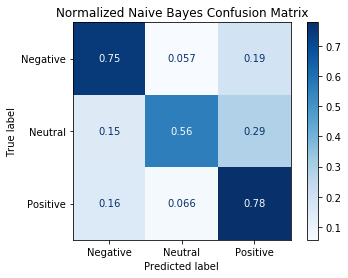

In [12]:
# classes to be used for labels on confusion matrix
classes = ['Negative', 'Neutral', 'Positive']

# normalized confusion matrix
disp = plot_confusion_matrix(nb_clf, X_test, y_test,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Normalized Naive Bayes Confusion Matrix')
plt.savefig('images/nb_matrix.png');

## Support Vector Machine
Support Vector Machine (SVM) is another model known for classifying text based data well. One of the requirements that make text data and SVMs compatible is scaled data. The features we engineered with Tfidf are all on the same scale. 

In [13]:
# instantiate multinomial naive bayes object
svm_clf = SGDClassifier()

# train naive bayes
svm_clf = svm_clf.fit(X_train, y_train)

# predict on train and test
y_train_preds = svm_clf.predict(X_train)
y_test_preds = svm_clf.predict(X_test)

In [14]:
print('Training Accuracy: ', accuracy_score(y_train, y_train_preds))
print('Testing Accuracy: ', accuracy_score(y_test, y_test_preds))
print('\n')
print('Training F1: ', f1_score(y_train, y_train_preds, average='weighted'))
print('Testing F1: ', f1_score(y_test, y_test_preds, average='weighted'))

Training Accuracy:  0.8293007041281237
Testing Accuracy:  0.8149624644059021


Training F1:  0.8289638541524147
Testing F1:  0.8147211317997386


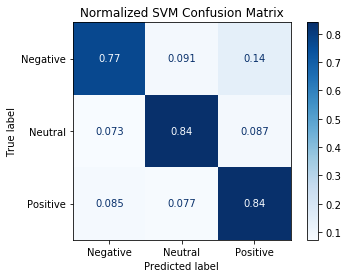

In [15]:
# normalized confusion matrix
disp = plot_confusion_matrix(svm_clf, X_test, y_test,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Normalized SVM Confusion Matrix')
plt.savefig('images/svm_matrix.png');

## RandomForest
Random Forest is an ensemble method of aggregating and averaging a bunch of decision trees in order to avoid overfitting. This will be an attempt with a more complicated model that typically requires significant hyperparameter tuning.

In [16]:
# instantiate RandomForest
rf_clf = RandomForestClassifier(random_state=88, max_depth=4)

# fit data to RandomForest
rf_clf.fit(X_train, y_train)

# predict on training and test data
y_train_preds = rf_clf.predict(X_train)
y_test_preds = rf_clf.predict(X_test)

In [17]:
print('Training Accuracy: ', accuracy_score(y_train, y_train_preds))
print('Testing Accuracy: ', accuracy_score(y_test, y_test_preds))
print('\n')
print('Training F1: ', f1_score(y_train, y_train_preds, average='weighted'))
print('Testing F1: ', f1_score(y_test, y_test_preds, average='weighted'))
print()

Training Accuracy:  0.4414434626535966
Testing Accuracy:  0.4403313486927259


Training F1:  0.31132486777326546
Testing F1:  0.3103137684671623



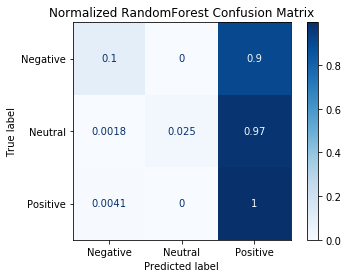

In [18]:
# normalized confusion matrix
disp = plot_confusion_matrix(rf_clf, X_test, y_test,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Normalized RandomForest Confusion Matrix')
plt.savefig('images/rf_matrix.png');

The results are in, and the **SVM is the clear winner** of our three vanilla models with scores in the low 80s. The Naive Bayes classifier was a not too distant second, but apparently struggled to identify the neutral class compared to the SVM. The RandomForest performed surprisingly poorly and overpredicted the positive class. I'll take what I have with the SVM, and see if I can improve my accuracy and F1 scores by optimizing hyperparameters with GridSearch. 